##TEAM MEMBERS NAMES: NIKHITHA PALUGULLA
and 
JAYA SATHYA CHANDRAPALAKA
    
##Objective: Credit Card Default Prediction

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install joblib
!pip install gradio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import joblib  # For saving and loading models
import gradio as gr  # For creating the web interface
import warnings
warnings.filterwarnings('ignore')


##Loading Data

In [4]:
# Load Data

df = pd.read_csv('default_of_credit_card_clients.csv')

#DATA CLEANING

# Use first row as header and drop it from data
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)

# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

#Feature Selection

In [5]:
#Feature Selection
selected_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
                    'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2',
                    'EDUCATION', 'MARRIAGE']

X = df[selected_features].copy()
y = df['default payment next month']

##Initial Data Understanding

In [6]:
# Initial Data Understanding

print("\nFirst few rows before processing:")
print(df.head())
print("\nInitial shape:", df.shape)


First few rows before processing:
0  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

0  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment ne

In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()
print("Duplicates removed.")


Missing values:
0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Number of duplicate rows: 0
Duplicates removed.


In [8]:
# Basic statistics after cleaning
print("\nBasic statistics after cleaning:")
print(df.describe())


Basic statistics after cleaning:
0                ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

0               AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   


##Data Visualization 



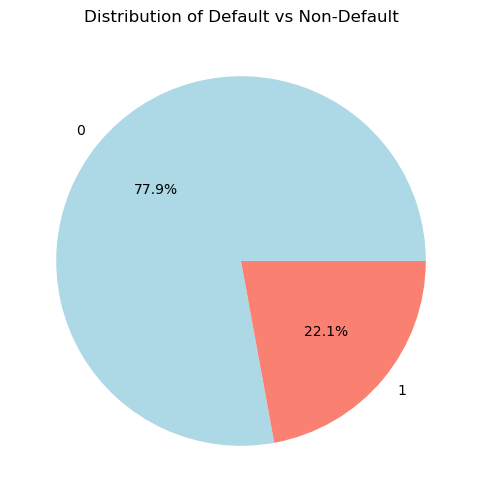


Target Variable Distribution Analysis:
0    0.7788
1    0.2212
Name: default payment next month, dtype: float64
0
default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                   

In [9]:
# Data Visualization
def visualize_features(df):
# 1. Target Variable Distribution
    plt.figure(figsize=(8, 6))
    df['default payment next month'].value_counts().plot(kind='pie', 
        autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title('Distribution of Default vs Non-Default')
    plt.ylabel('')
    plt.show()
    
    print("\nTarget Variable Distribution Analysis:")
    print(df['default payment next month'].value_counts(normalize=True))
    print(df.corr()['default payment next month'].sort_values(ascending=False))
visualize_features(df)

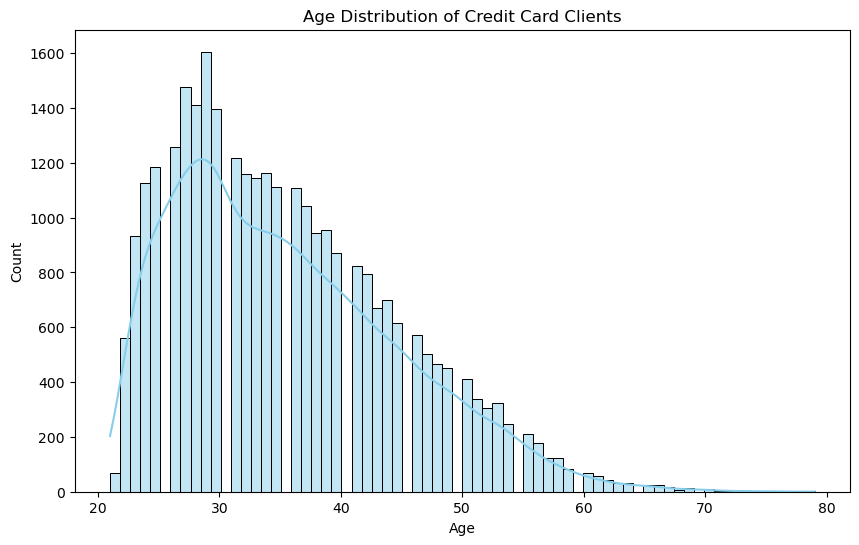


Age Distribution Statistics:
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [10]:
# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True, color='skyblue')
plt.title('Age Distribution of Credit Card Clients')
plt.xlabel('Age')
plt.show()
    
print("\nAge Distribution Statistics:")
print(df['AGE'].describe())

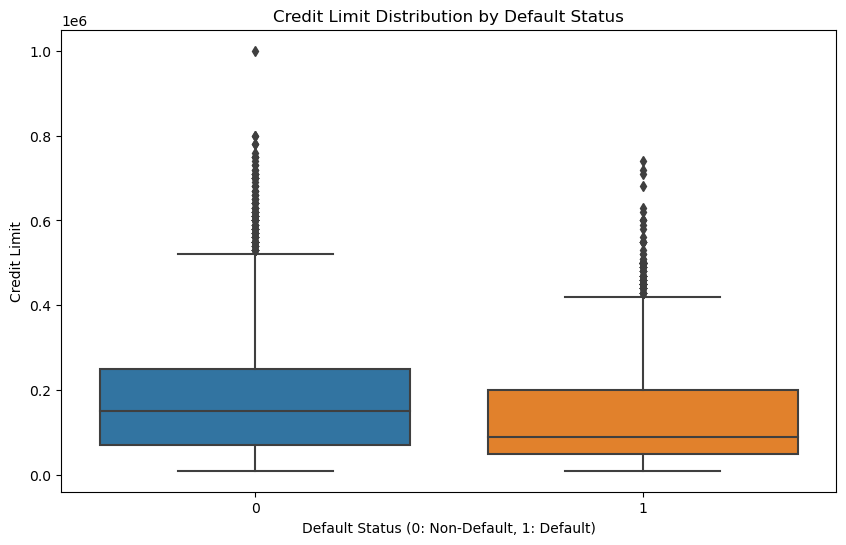


Credit Limit Statistics by Default Status:
                              count           mean            std      min  \
default payment next month                                                   
0                           23364.0  178099.726074  131628.359660  10000.0   
1                            6636.0  130109.656420  115378.540571  10000.0   

                                25%       50%       75%        max  
default payment next month                                          
0                           70000.0  150000.0  250000.0  1000000.0  
1                           50000.0   90000.0  200000.0   740000.0  


In [11]:
# 3. Credit Limit Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Default Status (0: Non-Default, 1: Default)')
plt.ylabel('Credit Limit')
plt.show()
    
print("\nCredit Limit Statistics by Default Status:")
print(df.groupby('default payment next month')['LIMIT_BAL'].describe())

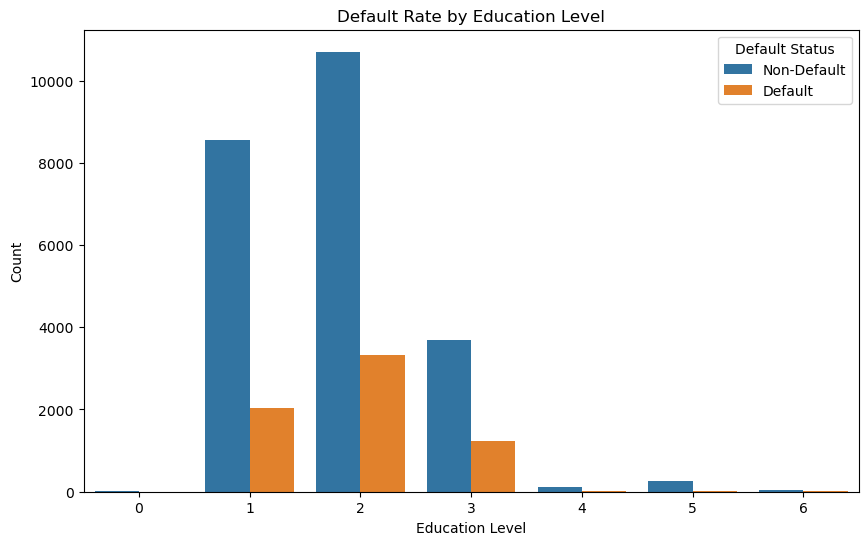


Default Rate by Education Level:
default payment next month           0          1
EDUCATION                                        
0                           100.000000   0.000000
1                            80.765234  19.234766
2                            76.265146  23.734854
3                            74.842384  25.157616
4                            94.308943   5.691057
5                            93.571429   6.428571
6                            84.313725  15.686275


In [12]:
# 4. Education Level and Default Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCATION', hue='default payment next month', data=df)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.show()

print("\nDefault Rate by Education Level:")
print(pd.crosstab(df['EDUCATION'], df['default payment next month'], 
          normalize='index') * 100)

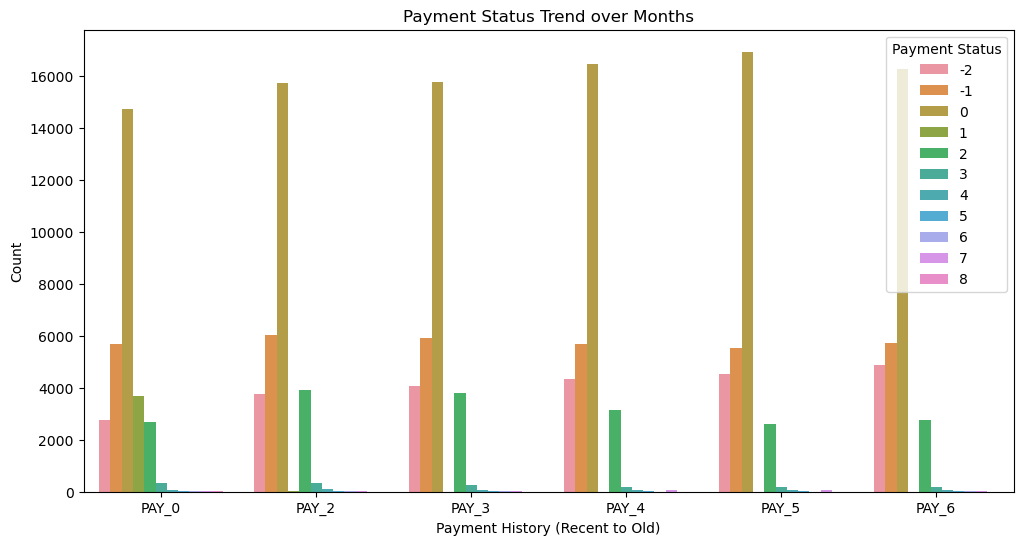

In [13]:
# 5. Payment Status Trend
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
payment_data = df[payment_cols].melt(var_name='Month', value_name='Status')
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Status', data=payment_data)
plt.title('Payment Status Trend over Months')
plt.xlabel('Payment History (Recent to Old)')
plt.ylabel('Count')
plt.legend(title='Payment Status')
plt.show()

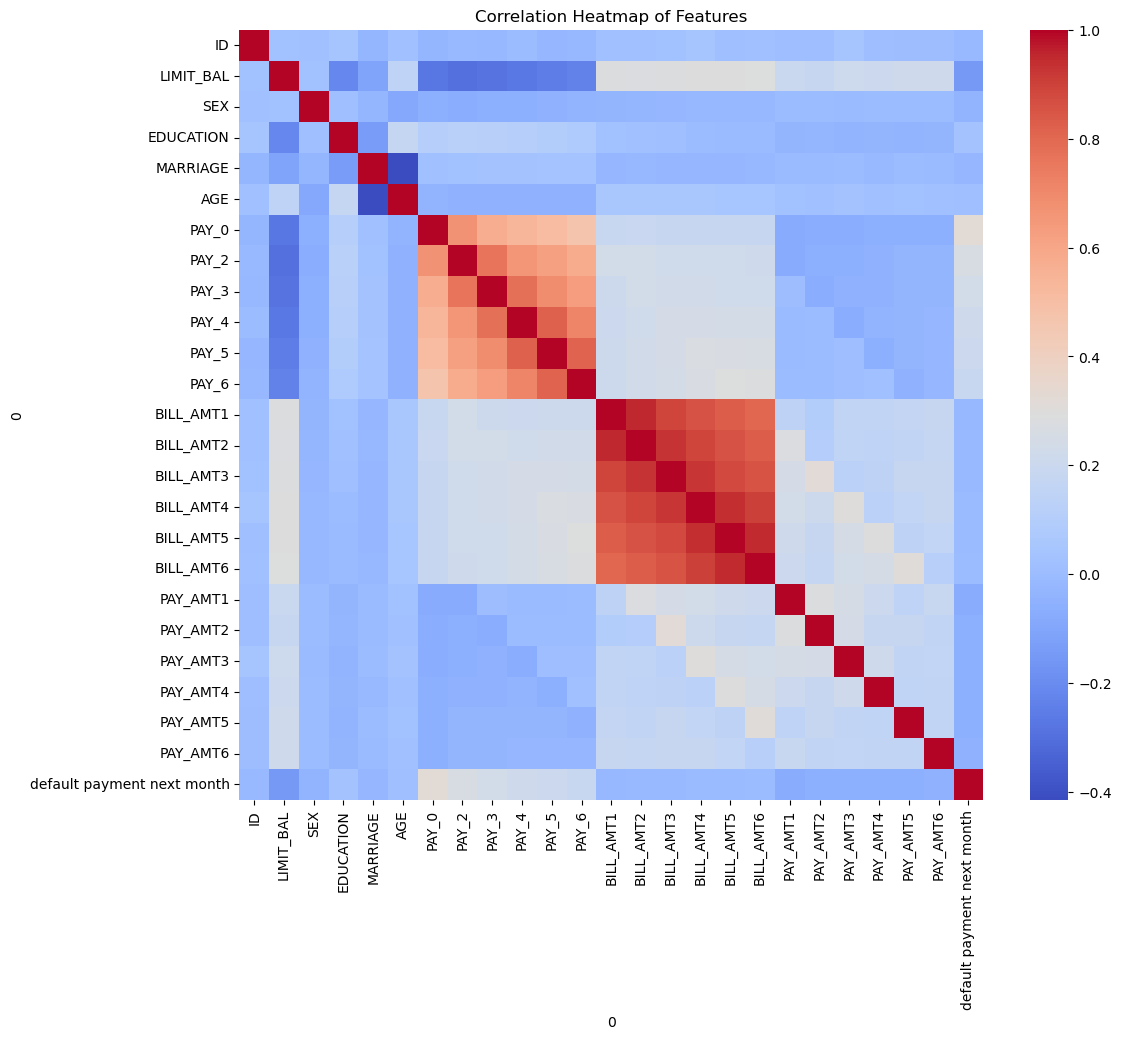


Correlation with Default:
0
default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153

In [14]:
# 6. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()
    
print("\nCorrelation with Default:")
print(df.corr()['default payment next month'].sort_values(ascending=False))

 ###Splitting Data

In [15]:
# First split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 24000
Testing set size: 6000


# Feature Scaling and Preprocessing

In [16]:
# Feature Scaling and Preprocessing

numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']
categorical_features = ['EDUCATION', 'MARRIAGE']

# Initialize transformers
scaler = StandardScaler()
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
label_encoder = LabelEncoder()


# Prepare data for Logistic Regression

In [17]:

X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

# Scale numeric features
X_train_lr[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_lr[numeric_features] = scaler.transform(X_test[numeric_features])

In [18]:
# One-hot encode categorical features
onehot_train = onehot.fit_transform(X_train[categorical_features])
onehot_test = onehot.transform(X_test[categorical_features])

# Get feature names for one-hot encoded columns
onehot_columns = []
for i, feature in enumerate(categorical_features):
    feature_names = [f"{feature}_{val}" for val in onehot.categories_[i]]
    onehot_columns.extend(feature_names)

# Create final datasets for logistic regression
numeric_data_train = X_train_lr[numeric_features].reset_index(drop=True)
numeric_data_test = X_test_lr[numeric_features].reset_index(drop=True)
onehot_data_train = pd.DataFrame(onehot_train, columns=onehot_columns)
onehot_data_test = pd.DataFrame(onehot_test, columns=onehot_columns)

X_train_lr = pd.concat([numeric_data_train, onehot_data_train], axis=1)
X_test_lr = pd.concat([numeric_data_test, onehot_data_test], axis=1)


# Prepare data for Random Forest

In [19]:
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

# Scale numeric features
X_train_rf[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_rf[numeric_features] = scaler.transform(X_test[numeric_features])

# Label encode categorical features
for col in categorical_features:
    X_train_rf[col] = label_encoder.fit_transform(X_train_rf[col])
    X_test_rf[col] = label_encoder.transform(X_test_rf[col])

In [20]:
# Verify shapes
print("\nDataset shapes:")
print(f"Logistic Regression - Training: {X_train_lr.shape}, Testing: {X_test_lr.shape}")
print(f"Random Forest - Training: {X_train_rf.shape}, Testing: {X_test_rf.shape}")
print(f"Target - Training: {y_train.shape}, Testing: {y_test.shape}")


Dataset shapes:
Logistic Regression - Training: (24000, 17), Testing: (6000, 17)
Random Forest - Training: (24000, 11), Testing: (6000, 11)
Target - Training: (24000,), Testing: (6000,)


# Train models


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Logistic Regression with Grid Search
print("\nTraining Logistic Regression...")
lr_params = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced'],
    'max_iter': [1000]
}
lr_model = LogisticRegression()
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='roc_auc')
lr_grid.fit(X_train_lr, y_train)
print("Best Logistic Regression parameters:", lr_grid.best_params_)

# Get predictions
y_pred_lr = lr_grid.predict(X_test_lr)
y_prob_lr = lr_grid.predict_proba(X_test_lr)[:, 1]

# Print classifier results
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))




Training Logistic Regression...
Best Logistic Regression parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.51      0.64      4687
           1       0.29      0.72      0.41      1313

    accuracy                           0.55      6000
   macro avg       0.58      0.61      0.53      6000
weighted avg       0.74      0.55      0.59      6000



In [23]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)




Confusion Matrix:
[[2389 2298]
 [ 373  940]]


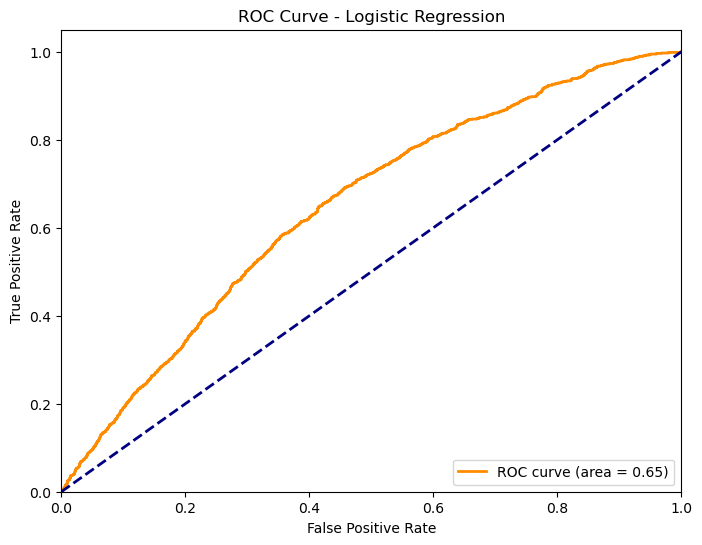

In [24]:
# Calculate and plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [25]:
# Print additional metrics
print("\nDetailed Metrics:")
print(f"ROC AUC Score: {roc_auc_lr:.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.3f}")


Detailed Metrics:
ROC AUC Score: 0.647
Accuracy: 0.555
Precision: 0.290
Recall: 0.716
F1 Score: 0.413


In [26]:
# Random Forest with Grid Search
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train_rf, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)

Best Random Forest parameters: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}


In [27]:
# Get predictions
y_pred_rf = rf_grid.predict(X_test_rf)
y_prob_rf = rf_grid.predict_proba(X_test_rf)[:, 1]

# Print classifier results
print("\nRandom Forest Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))




Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4687
           1       0.50      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.79      6000



In [28]:
print("\nConfusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)



Confusion Matrix:
[[3941  746]
 [ 571  742]]


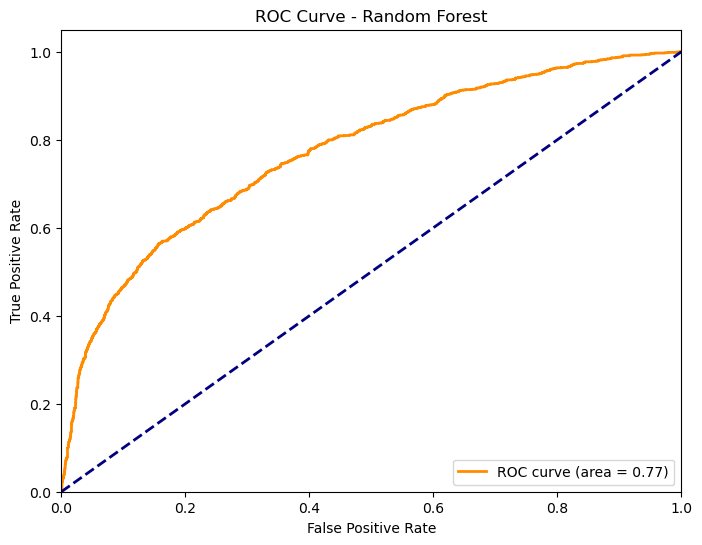

In [29]:
# Calculate and plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Print additional metrics
print("\nDetailed Metrics:")
print(f"ROC AUC Score: {roc_auc_rf:.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.3f}")



Detailed Metrics:
ROC AUC Score: 0.772
Accuracy: 0.780
Precision: 0.499
Recall: 0.565
F1 Score: 0.530


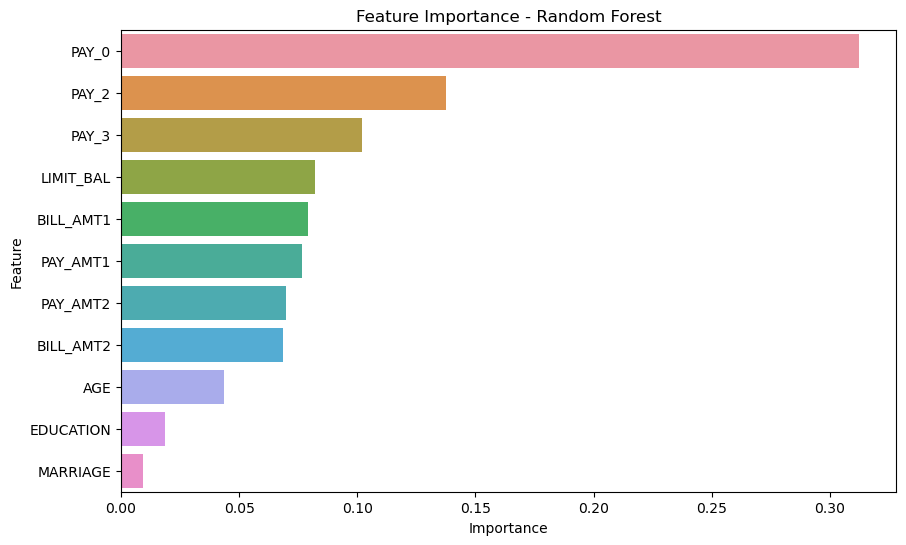


Feature Importance:
      feature  importance
2       PAY_0    0.312431
3       PAY_2    0.137697
4       PAY_3    0.102202
0   LIMIT_BAL    0.082266
5   BILL_AMT1    0.079077
7    PAY_AMT1    0.076518
8    PAY_AMT2    0.069747
6   BILL_AMT2    0.068499
1         AGE    0.043561
9   EDUCATION    0.018615
10   MARRIAGE    0.009386


In [32]:
# Feature Importance Plot
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

In [154]:
# 6. Handling Data Imbalance
print("\n=== Class Distribution ===")
print(y_train.value_counts(normalize=True))


=== Class Distribution ===
0    0.778208
1    0.221792
Name: default payment next month, dtype: float64


In [155]:
# Print results
print("\nCross-Validation Results (5-fold):")
for model_name in cv_results:
    print(f"\n{model_name}:")
    for metric in metrics:
        result = cv_results[model_name][metric]
        print(f"\n{metric.capitalize()}:")
        print(f"Mean: {result['mean']:.3f} (+/- {result['std'] * 2:.3f})")
        print(f"Individual fold scores: {result['scores']}")
    print("-" * 60)




Cross-Validation Results (5-fold):

Logistic Regression:

Accuracy:
Mean: 0.549 (+/- 0.015)
Individual fold scores: [0.55708333 0.54729167 0.535625   0.55166667 0.55208333]

Precision:
Mean: 0.290 (+/- 0.015)
Individual fold scores: [0.30072052 0.28457143 0.27920121 0.29384437 0.29331307]

Recall:
Mean: 0.716 (+/- 0.030)
Individual fold scores: [0.73767442 0.7168906  0.70104068 0.69825207 0.72693032]

F1:
Mean: 0.413 (+/- 0.019)
Individual fold scores: [0.42726293 0.40741751 0.39935327 0.41362398 0.41797509]
------------------------------------------------------------

Random Forest:

Accuracy:
Mean: 0.787 (+/- 0.009)
Individual fold scores: [0.78229167 0.79       0.78395833 0.78291667 0.79375   ]

Precision:
Mean: 0.518 (+/- 0.016)
Individual fold scores: [0.51320423 0.51517857 0.50888099 0.51968504 0.53225806]

Recall:
Mean: 0.549 (+/- 0.013)
Individual fold scores: [0.54232558 0.5537428  0.54210028 0.54645814 0.55932203]

F1:
Mean: 0.533 (+/- 0.014)
Individual fold scores: [0.52736

In [156]:
# Save the best model
print("\n=== Saving Model ===")
model_data = {
    'model': rf_grid.best_estimator_,
    'features': selected_features,
    'scaler': scaler,
    'label_encoder': label_encoder
}
joblib.dump(model_data, 'credit_default_model.joblib')
print("Model saved successfully!")


=== Saving Model ===
Model saved successfully!


In [33]:
# Load the saved model and preprocessing objects
model_data = joblib.load('credit_default_model.joblib')
model = model_data['model']
scaler = model_data['scaler']
label_encoder = model_data['label_encoder']
selected_features = model_data['features']

def predict_default(limit_bal, age, pay_0, pay_2, pay_3, 
                   bill_amt1, bill_amt2, pay_amt1, pay_amt2,
                   education, marriage):
    try:
        # Create input data dictionary
        input_dict = {
            'LIMIT_BAL': float(limit_bal),
            'AGE': float(age),
            'PAY_0': float(pay_0),
            'PAY_2': float(pay_2),
            'PAY_3': float(pay_3),
            'BILL_AMT1': float(bill_amt1),
            'BILL_AMT2': float(bill_amt2),
            'PAY_AMT1': float(pay_amt1),
            'PAY_AMT2': float(pay_amt2),
            'EDUCATION': int(education),
            'MARRIAGE': int(marriage)
        }
        
        # Create DataFrame with the same feature order as training
        input_df = pd.DataFrame([input_dict])[selected_features]
        
        # Scale numeric features
        numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']
        input_df[numeric_features] = scaler.transform(input_df[numeric_features])
        
        # Encode categorical features (for Random Forest, we use label encoding)
        categorical_features = ['EDUCATION', 'MARRIAGE']
        for col in categorical_features:
            input_df[col] = label_encoder.transform(input_df[col])
        
        # Make prediction
        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0][1]
        
        # Format result
        if prediction == 1:
            result = f"""
             High Risk of Default
            
            Probability of default: {probability:.2%}
            
            Input Details:
            - Credit Limit: {limit_bal}
            - Age: {age}
            - Recent Payment Status: {pay_0}
            - Bill Amount 1: {bill_amt1}
            - Payment Amount 1: {pay_amt1}
            """
        else:
            result = f"""
             Low Risk of Default
            
            Probability of default: {probability:.2%}
            
            Input Details:
            - Credit Limit: {limit_bal}
            - Age: {age}
            - Recent Payment Status: {pay_0}
            - Bill Amount 1: {bill_amt1}
            - Payment Amount 1: {pay_amt1}
            """
        
        return result
    
    except Exception as e:
        return f"Error in prediction: {str(e)}"

# Create Gradio interface
demo = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit Balance"),
        gr.Number(label="Age"),
        gr.Number(label="Payment Status Month 0 (-1=early, 0=on time, 1-9=delay)"),
        gr.Number(label="Payment Status Month 2"),
        gr.Number(label="Payment Status Month 3"),
        gr.Number(label="Bill Amount 1"),
        gr.Number(label="Bill Amount 2"),
        gr.Number(label="Payment Amount 1"),
        gr.Number(label="Payment Amount 2"),
        gr.Number(label="Education (1=graduate, 2=university, 3=high school, 4=others)"),
        gr.Number(label="Marriage (1=married, 2=single, 3=others)")
    ],
    outputs=gr.Textbox(label="Default Prediction Result"),
    title="Credit Card Default Predictor",
    description="""
    Enter client information to predict credit card default probability.
    
    Guidelines:
    - Payment Status: -1 means paid early, 0 means paid on time, 1-9 means delay of 1-9 months
    - Education: 1=graduate school, 2=university, 3=high school, 4=others
    - Marriage: 1=married, 2=single, 3=others
    
    Example case: Credit limit=20000, Age=24, Pay_0=2, Pay_2=2, Pay_3=-1, 
                 Bill_Amt1=3913, Bill_Amt2=3102, Pay_Amt1=689, Pay_Amt2=0, 
                 Education=2, Marriage=1
    """,
    examples=[
        # Example from your dataset
        [20000, 24, 2, 2, -1, 3913, 3102, 689, 0, 2, 1]
    ],
    theme="default"
)

# Launch the app
if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.
